#Predicción de demanda de arriendo de autos en Chile, con FB Prophet, con data de google trends

In [ ]:
pip install fbprophet

In [ ]:
import time
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import io, base64, os, json, re, glob
import pandas as pd
import pydata_google_auth
from fbprophet import Prophet

Tomamos data de los ultimos 5 años.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Kaggle/arriendos_autos_chile.csv')
df.ds = pd.to_datetime(df.ds)
df = df.sort_values('ds', ascending=True)

In [ ]:
df.head()

,ds,y
0,2016-06-19,16
1,2016-06-26,17
2,2016-07-03,16
3,2016-07-10,49
4,2016-07-17,33


In [ ]:
df.tail()

,ds,y
256,2021-05-16,0
257,2021-05-23,48
258,2021-05-30,26
259,2021-06-06,38
260,2021-06-13,0


In [ ]:
df.describe()

,y
count,261.000000
mean,30.628352
std,23.257005
min,0.000000
25%,13.000000
50%,27.000000
75%,47.000000
max,100.000000


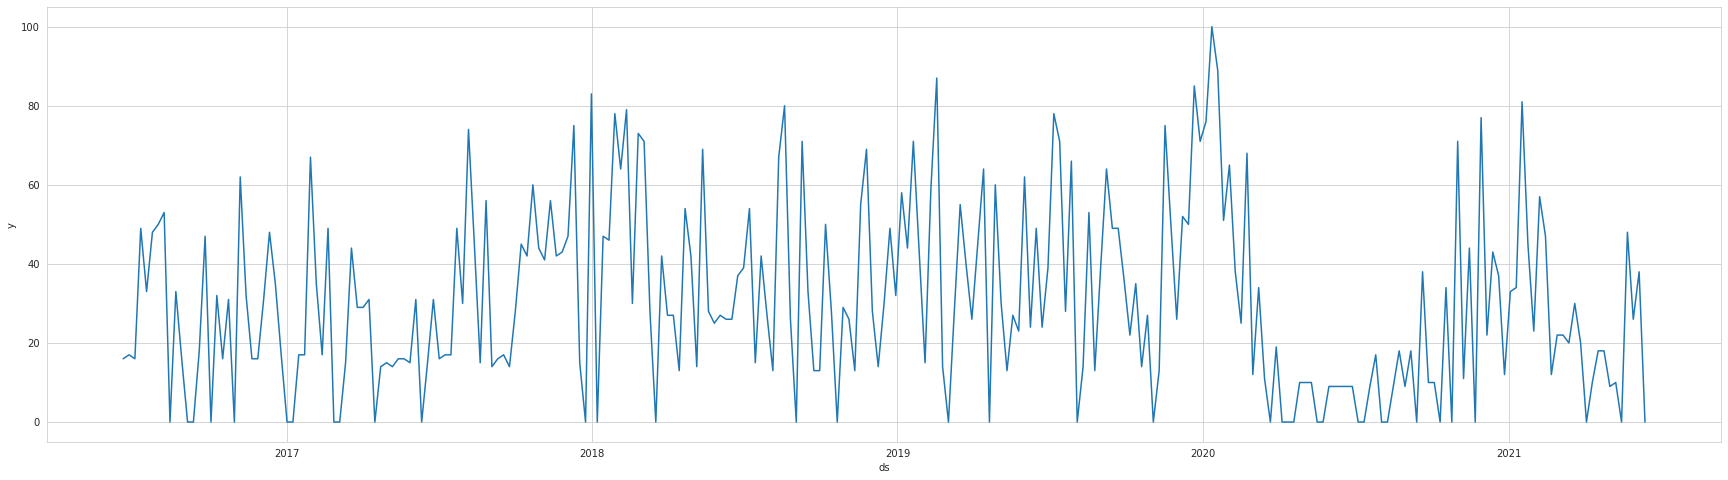

In [ ]:
plt.figure(figsize=(30, 8))
sns.set_style("whitegrid")
sns.lineplot(data = df, x="ds", y="y")

In [ ]:
train_dataset = df.copy()
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future = prophet_basic.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
621,2022-06-09
622,2022-06-10
623,2022-06-11
624,2022-06-12
625,2022-06-13


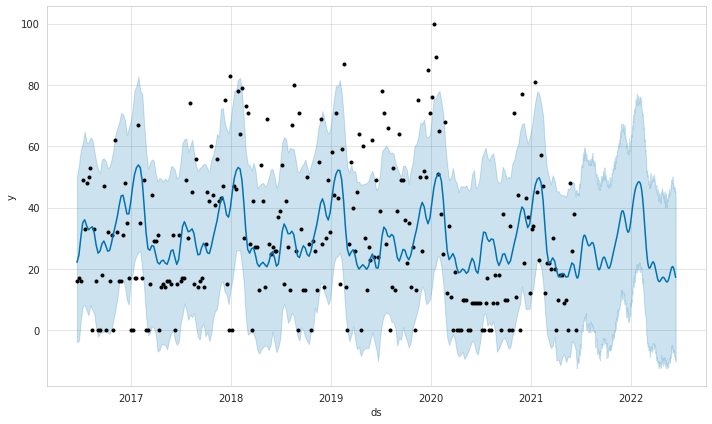

In [ ]:
forecast = prophet_basic.predict(future)
figl = prophet_basic.plot(forecast)

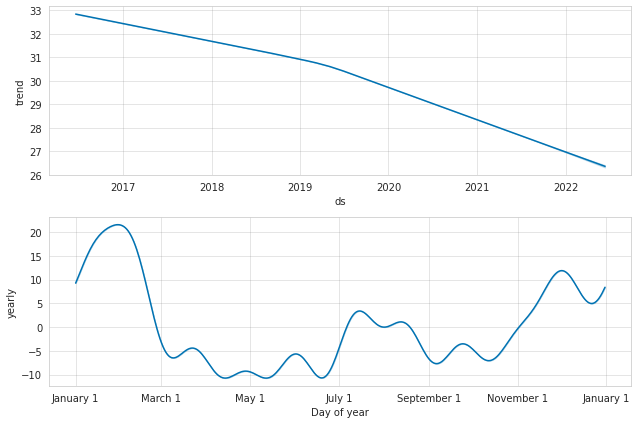

In [ ]:
figl = prophet_basic.plot_components(forecast)

Vemos una tendencia a la baja, año tras año, pero esto se debe principalmente a la baja de demanda que hemos tenido durante el ultimo año, dado por la pandemia.
En tanto, vemos la estacionalidad de los distintos meses del año, teniendo una mayor demanda en meses como enero, febrero y una baja demanda en los meses de mayo y junio.

Es por esto que haremos la predicción con datos del ultimo año.

In [91]:
df = pd.read_csv('/content/drive/MyDrive/Data Kaggle/arriendos_autos_chile2.csv')
df.ds = pd.to_datetime(df.ds)
df = df.sort_values('ds', ascending=True)

In [92]:
df.head()

,ds,y
0,2020-06-21,0
1,2020-06-28,13
2,2020-07-05,13
3,2020-07-12,0
4,2020-07-19,40


In [93]:
df.describe()

,y
count,52.000000
mean,28.865385
std,24.242265
min,0.000000
25%,13.000000
50%,25.000000
75%,46.750000
max,100.000000


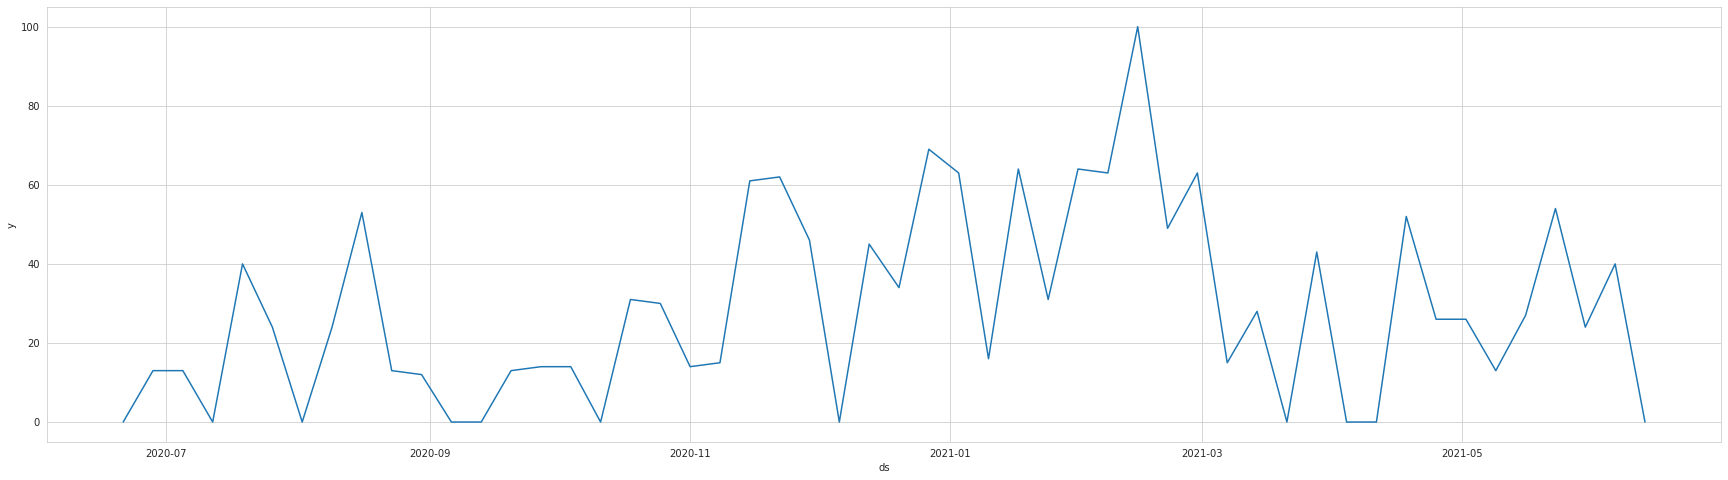

In [94]:
plt.figure(figsize=(30, 8))
sns.lineplot(data = df, x="ds", y="y")

In [95]:
train_dataset = df.copy()
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future = prophet_basic.make_future_dataframe(periods=365)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
412,2022-06-09
413,2022-06-10
414,2022-06-11
415,2022-06-12
416,2022-06-13


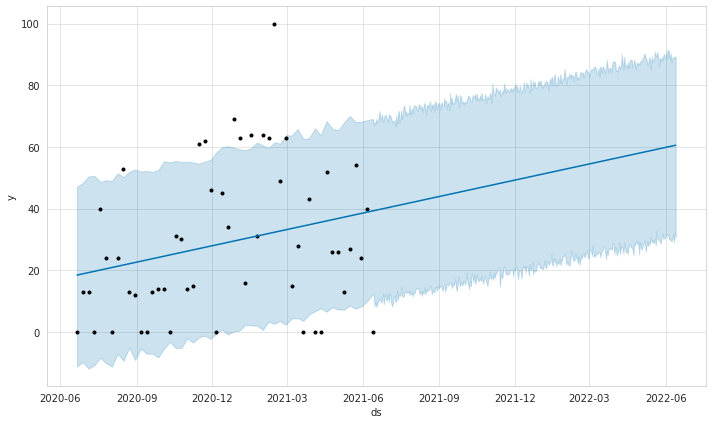

In [96]:
forecast = prophet_basic.predict(future)
figl = prophet_basic.plot(forecast)

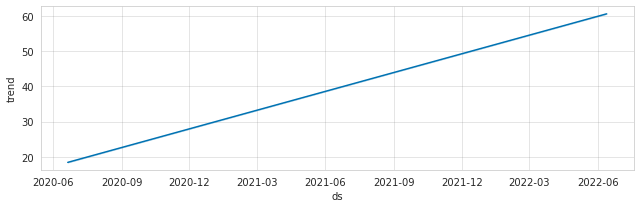

In [97]:
figl = prophet_basic.plot_components(forecast)

Con los datos del ultimo año, vemos una fuerte recuperación y una tendencia positiva que esperamos siga impactanto positivamente a la industria.

#Conclusiones
Con los datos extraídos de Google trends y con FB Prophet, podemos crear una herramienta que nos permita predecir demanda futura, en base a las búsquedas que se hacen por internet. De todas maneras, dado el impacto que ha tenido la pandemia, el forecast puede estar fuertemente influenciado por la baja demanda dada durante el año 2020.